# PRCP-1016-HeartDisease Pred

## PTID-CDS-JAN-23-1448

## Project Name: Heart Disease Prediction
### Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

### Understanding the Problem Statement in this Business Case :
Day by day the cases of heart diseases are increasing at a rapid rate and it’s very Important and concerning to predict any such diseases beforehand. This diagnosis is a difficult task i.e. it should be performed precisely and efficiently.We need a heart disease prediction system to predict whether the patient is likely to be diagnosed with a heart disease or not using the medical history of the patient.

# Domain Analysis
**patient_id** = ID of particular patient

**slope_of_peak_exercise_st_segment** = While a high ST depression is considered normal & healthy. The “ slope ” hue, refers to the peak exercise ST

**thal** = A blood disorder called thalassemia,[normal, reversible defect, fixed defect]

**resting_blood_pressure** = blood pressure tells a lot about your general health. High blood pressure or hypertension can lead to several heart related

**chest_pain_type** = Most of the chest pain causes are not dangerous to health, but some are serious, while the least cases are life-threatening.

**num_major_vessels** = Major Blood Vessels of the Heart: Blood exits the right ventricle through the pulmonary trunk artery. Approximately two inches

**fasting_blood_sugar_gt_120_mg_per_dl** = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false

**resting_ekg_results** = The electrocardiogram (ECG or EKG) is a test that measures the heart’s electrical activity, and a resting ECG is

**serum_cholesterol_mg_per_dl** = A person’s serum cholesterol level represents the amount of total cholesterol in their blood. A person’s serum

**oldpeak_eq_st_depression** = oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

**sex** = sex (1 = male; 0 = female)

**Age** = Age of patients

**max_heart_rate_achieved** = This is the average maximum number of times your heart should beat per minute during exercise.

**exercise_induced_angina** = Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.[0: no, 1: yes]

**heart_disease_present** = Target variable 0:No heart disease, 1:heart disease

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
#Reading Values and labels dataset in a different DataFrames
data_val = pd.read_csv('values.csv')
data_lab = pd.read_csv('labels.csv')


In [3]:
# Load Data
df1=pd.read_csv('values.csv')
df1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
df2=pd.read_csv('labels.csv')
df2

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
# Renaming Common column name
df2.rename({'patient_id':'p_id'},axis=1,inplace=True)
df2

,p_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [6]:
# Combining  both Labels and Value dataframes together
data=pd.concat([df1,df2],axis=1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,p_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0


In [7]:
# Delete one of the common column
data=data.drop('p_id',axis=1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Basic checks

In [8]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [9]:
# we are going to rename some columns

data.rename({'slope_of_peak_exercise_st_segment':'slope_sts','resting_blood_pressure':'rest_bp',
              'fasting_blood_sugar_gt_120_mg_per_dl':'fbs','serum_cholesterol_mg_per_dl':'serum_cholesterol',
             'oldpeak_eq_st_depression':'st_depression','max_heart_rate_achieved':'max_hr',
              'exercise_induced_angina':'exe_angina','chest_pain_type':'cp_type','num_major_vessels':'num_mv',
            'resting_ekg_results':'rest_ekg','heart_disease_present':'Hd_Present'},axis=1,inplace=True)

In [10]:
data.columns

Index(['patient_id', 'slope_sts', 'thal', 'rest_bp', 'cp_type', 'num_mv',
       'fbs', 'rest_ekg', 'serum_cholesterol', 'st_depression', 'sex', 'age',
       'max_hr', 'exe_angina', 'Hd_Present'],
      dtype='object')

In [11]:
data.head() # it shows data of 5 first rows

# as you can see now after renaming columns , it looks more neat

,patient_id,slope_sts,thal,rest_bp,cp_type,num_mv,fbs,rest_ekg,serum_cholesterol,st_depression,sex,age,max_hr,exe_angina,Hd_Present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [12]:
data.tail() # it shows data of last 5 rows

,patient_id,slope_sts,thal,rest_bp,cp_type,num_mv,fbs,rest_ekg,serum_cholesterol,st_depression,sex,age,max_hr,exe_angina,Hd_Present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [13]:
data.shape

(180, 15)

 #  Insight
- Data set has 15 columns and 180 rows
- 14 parameters and 1 target columns

In [14]:
data.dtypes

patient_id            object
slope_sts              int64
thal                  object
rest_bp                int64
cp_type                int64
num_mv                 int64
fbs                    int64
rest_ekg               int64
serum_cholesterol      int64
st_depression        float64
sex                    int64
age                    int64
max_hr                 int64
exe_angina             int64
Hd_Present             int64
dtype: object

 # Insight
- 2 columns are categorical
- 13 columns are numerical

In [15]:
data.info() # Describing datatypes, entries and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         180 non-null    object 
 1   slope_sts          180 non-null    int64  
 2   thal               180 non-null    object 
 3   rest_bp            180 non-null    int64  
 4   cp_type            180 non-null    int64  
 5   num_mv             180 non-null    int64  
 6   fbs                180 non-null    int64  
 7   rest_ekg           180 non-null    int64  
 8   serum_cholesterol  180 non-null    int64  
 9   st_depression      180 non-null    float64
 10  sex                180 non-null    int64  
 11  age                180 non-null    int64  
 12  max_hr             180 non-null    int64  
 13  exe_angina         180 non-null    int64  
 14  Hd_Present         180 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 21.2+ KB


In [16]:
# we can conclude that there are no null values

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_sts,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
rest_bp,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
cp_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_mv,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fbs,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
rest_ekg,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


 # Insight
- rest_bp- minimum value is 94,average value is 130 and maximum value is 180
- serum_cholesterol-minimum value is 126,average value is 246 and maximum value is 564
- max_hr-minimum value is 96,average value is 152 and maximum value is 202
- age-minimum age is 29,average age is 55 and maximum age is 77

In [18]:
# Finding Unique Values & Checking Value counts of target variable
data.Hd_Present.unique()

array([0, 1], dtype=int64)

In [19]:
data.Hd_Present.value_counts()

0    100
1     80
Name: Hd_Present, dtype: int64

 # Insight
- 1- Heart Disease Present
- 0- Heart Disease Abscent

# EXPLORATORY DATA ANALYSIS

 # Univariate

In [20]:
data.columns

Index(['patient_id', 'slope_sts', 'thal', 'rest_bp', 'cp_type', 'num_mv',
       'fbs', 'rest_ekg', 'serum_cholesterol', 'st_depression', 'sex', 'age',
       'max_hr', 'exe_angina', 'Hd_Present'],
      dtype='object')

<AxesSubplot:xlabel='rest_bp', ylabel='Count'>

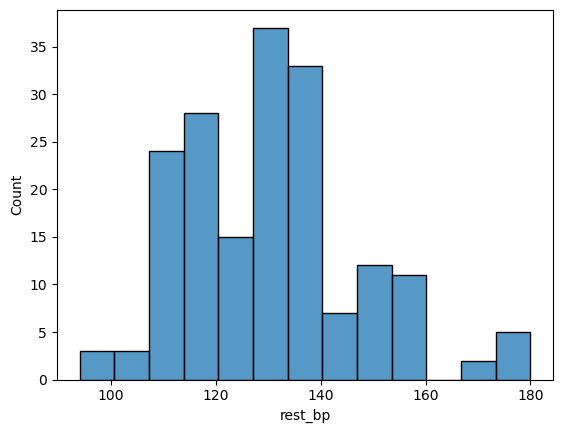

In [21]:
sns.histplot(x='rest_bp',data=data)

<AxesSubplot:xlabel='serum_cholesterol', ylabel='Count'>

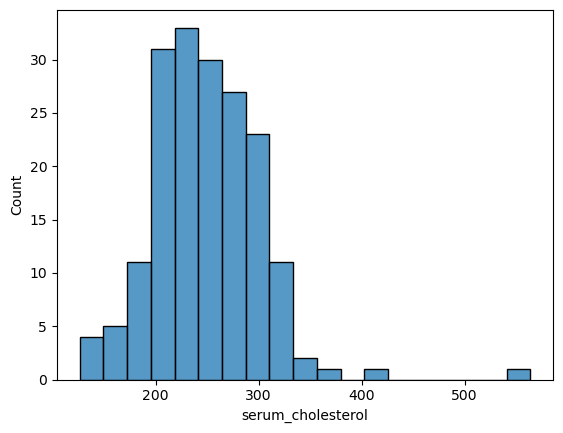

In [22]:
sns.histplot(x='serum_cholesterol',data=data)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_hr', ylabel='Density'>

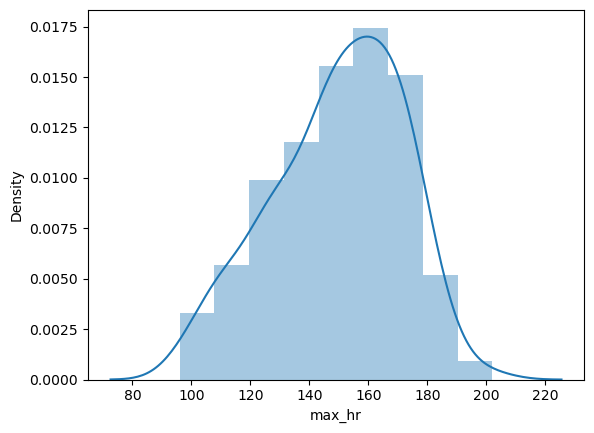

In [23]:
sns.distplot(data['max_hr'])

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

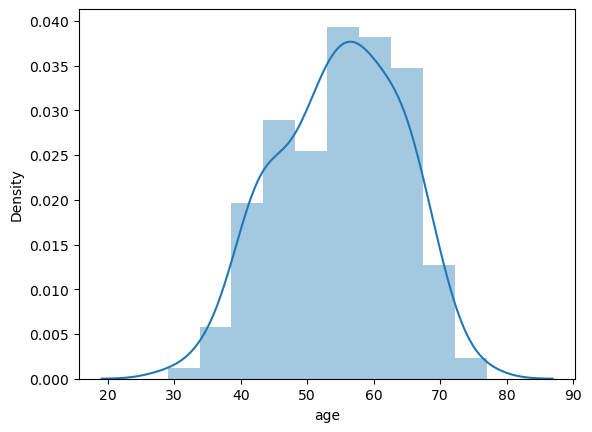

In [24]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='st_depression', ylabel='Count'>

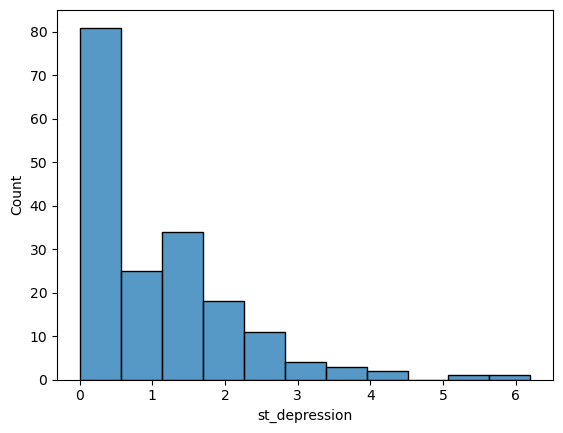

In [25]:
sns.histplot(x='st_depression',data=data)

In [26]:
#Categorical and Nominal data 


<AxesSubplot:ylabel='slope_sts'>

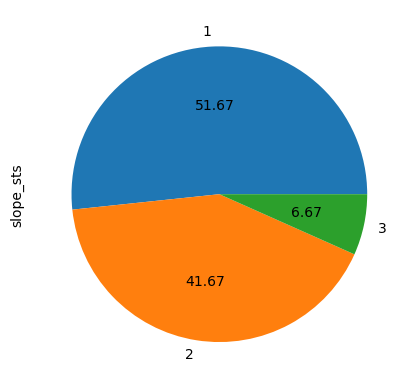

In [27]:
data['slope_sts'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:xlabel='thal', ylabel='count'>

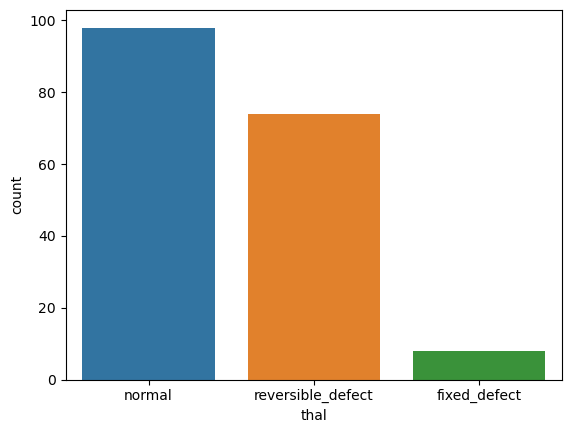

In [28]:
sns.countplot(x='thal',data=data)

<AxesSubplot:xlabel='cp_type', ylabel='count'>

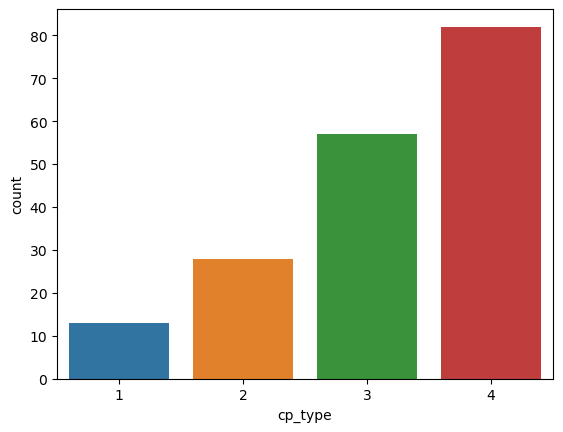

In [29]:
sns.countplot(x='cp_type',data=data)

<AxesSubplot:xlabel='rest_ekg', ylabel='count'>

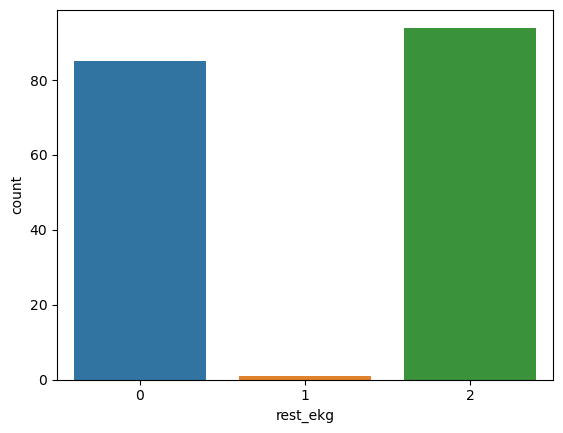

In [30]:
sns.countplot(x='rest_ekg',data=data)

<AxesSubplot:xlabel='Hd_Present', ylabel='count'>

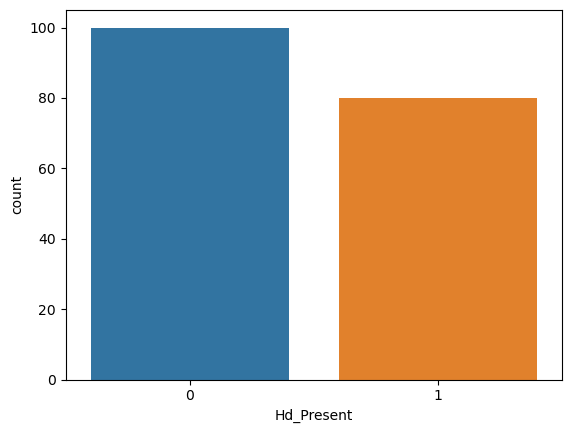

In [31]:
sns.countplot(x='Hd_Present',data=data)

### now we will use boxplot to find out outliers present in numerical data.

<AxesSubplot:xlabel='rest_bp'>

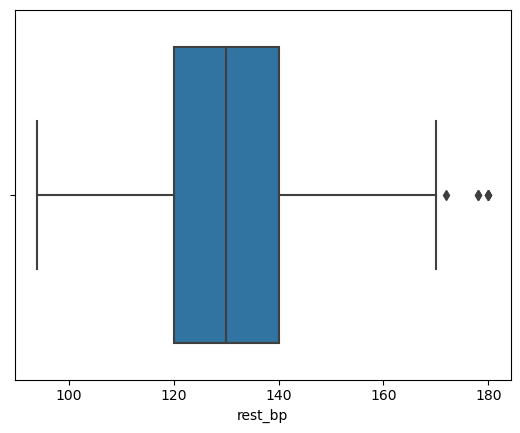

In [32]:
sns.boxplot(x='rest_bp',data=data)

<AxesSubplot:xlabel='max_hr'>

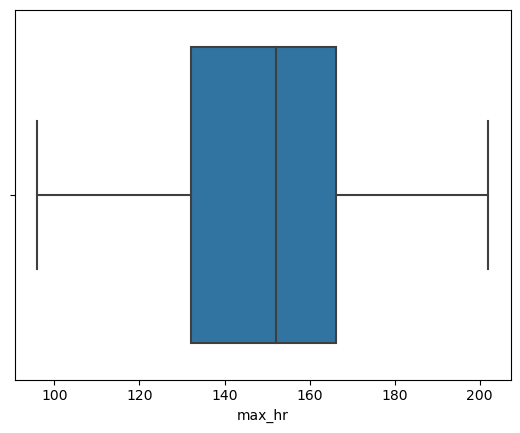

In [33]:
sns.boxplot(x='max_hr',data=data)

<AxesSubplot:xlabel='serum_cholesterol'>

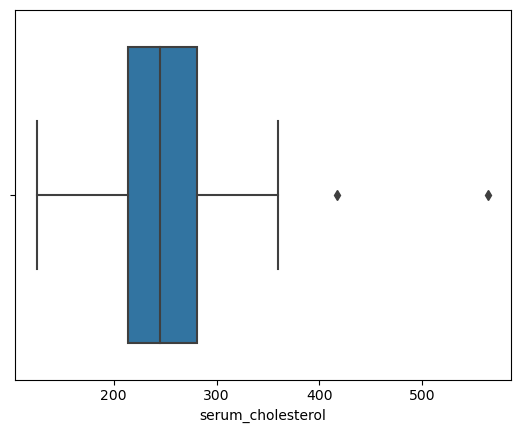

In [34]:
sns.boxplot(x='serum_cholesterol',data=data)

<AxesSubplot:xlabel='age'>

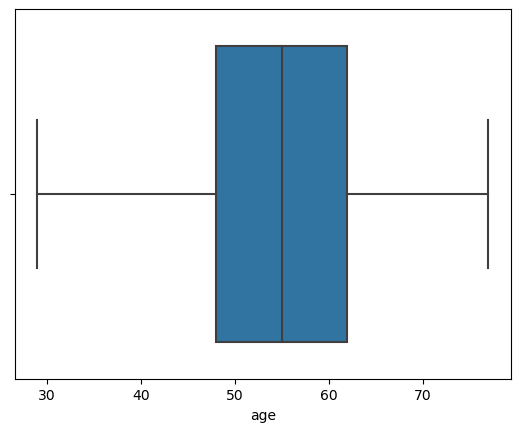

In [35]:
sns.boxplot(x='age',data=data)

# insights of univariate analysis

- Distribution of resting blood pressure is more betweem 110 to 140

- Distribution of cholestrol is more between 200 to 300

- Distribution of age is more between 50 to 70

- Distribution of maximum heart rate is more betweem 140 to 180


# outliers

- rest_bp and has serum_cholesterol

# Bivariate

Text(0.5, 1.0, 'Sex v/s HD_Present')

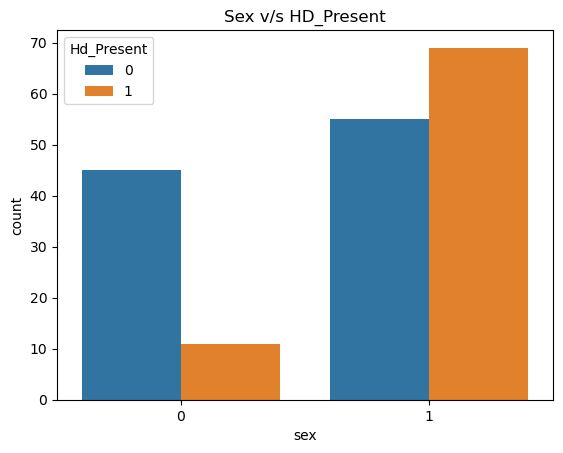

In [36]:
# Analysing Heart Disease with respect to sex.
sns.countplot(data=data,x='sex',hue='Hd_Present')
plt.title('Sex v/s HD_Present')

# Insight
- 1:male , o:female

- Heart Disease is present more in males.

Text(0.5, 1.0, 'Sex v/s Thalassemia')

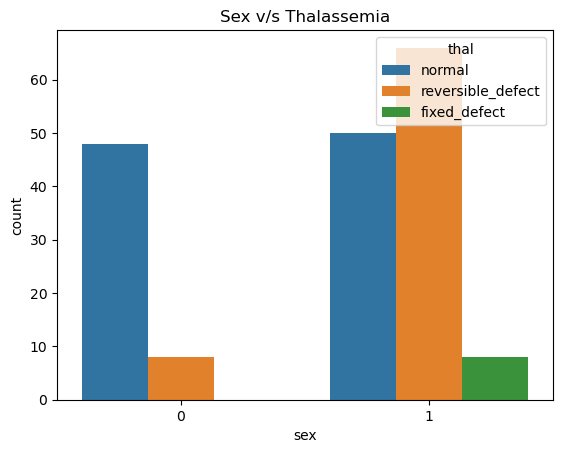

In [37]:
# Analysing Thalassemia with respect to sex.
sns.countplot(data=data,x='sex',hue='thal')
plt.title('Sex v/s Thalassemia')

# Insight
 - 0: female, 1: male
 - male have more thalassemia

Text(0.5, 1.0, 'Chestpain type v/s Heart Disease Present')

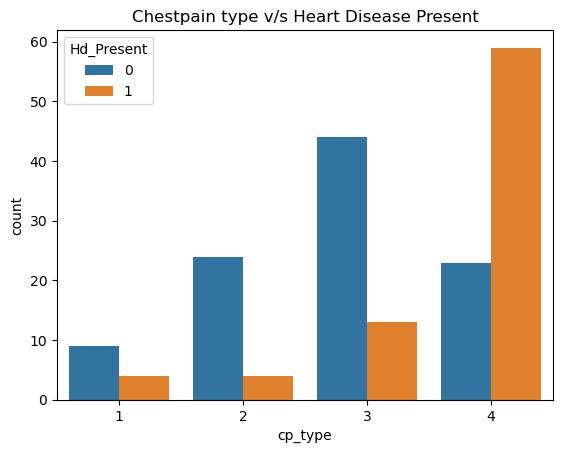

In [38]:
# Analysing Heart Disease with respect to Chestpain Type
sns.countplot(data=data,x='cp_type',hue='Hd_Present')
plt.title('Chestpain type v/s Heart Disease Present')

 # Insight
- 1 = typical angina
- 2 = atypical angina
- 3 = non — anginal pain
- 4 = asymptotic
- 1- Heart Disease Present and 0- Heart Disease Abscent
- asymptomatic chest pain is more.

Text(0.5, 1.0, 'Thalassemia v/s Heart Disease Present')

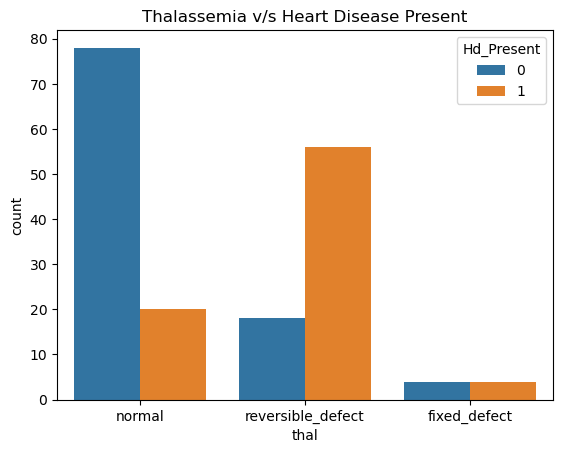

In [39]:
# Analysing Heart Disease with respect to Thalassemia
sns.countplot(data=data,x='thal',hue='Hd_Present')
plt.title('Thalassemia v/s Heart Disease Present')

# Insight
- 1- Heart Disease Present and 0- Heart Disease Abscent
- reversible defect is more

Text(0.5, 1.0, 'Slope_of_peak_exercise v/s Heart Disease Present')

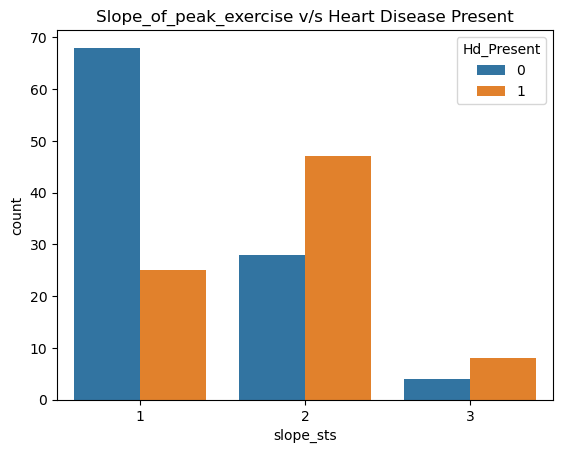

In [40]:
# Analysing Heart Disease with respect to Slope of peak exercise
sns.countplot(data=data,x='slope_sts',hue='Hd_Present')
plt.title('Slope_of_peak_exercise v/s Heart Disease Present')

# Insight
- 1 = upsloping
- 2 = flat
- 3 = downsloping
- 1- Heart Disease Present and 0- Heart Disease Abscent
- Flat Slope is more

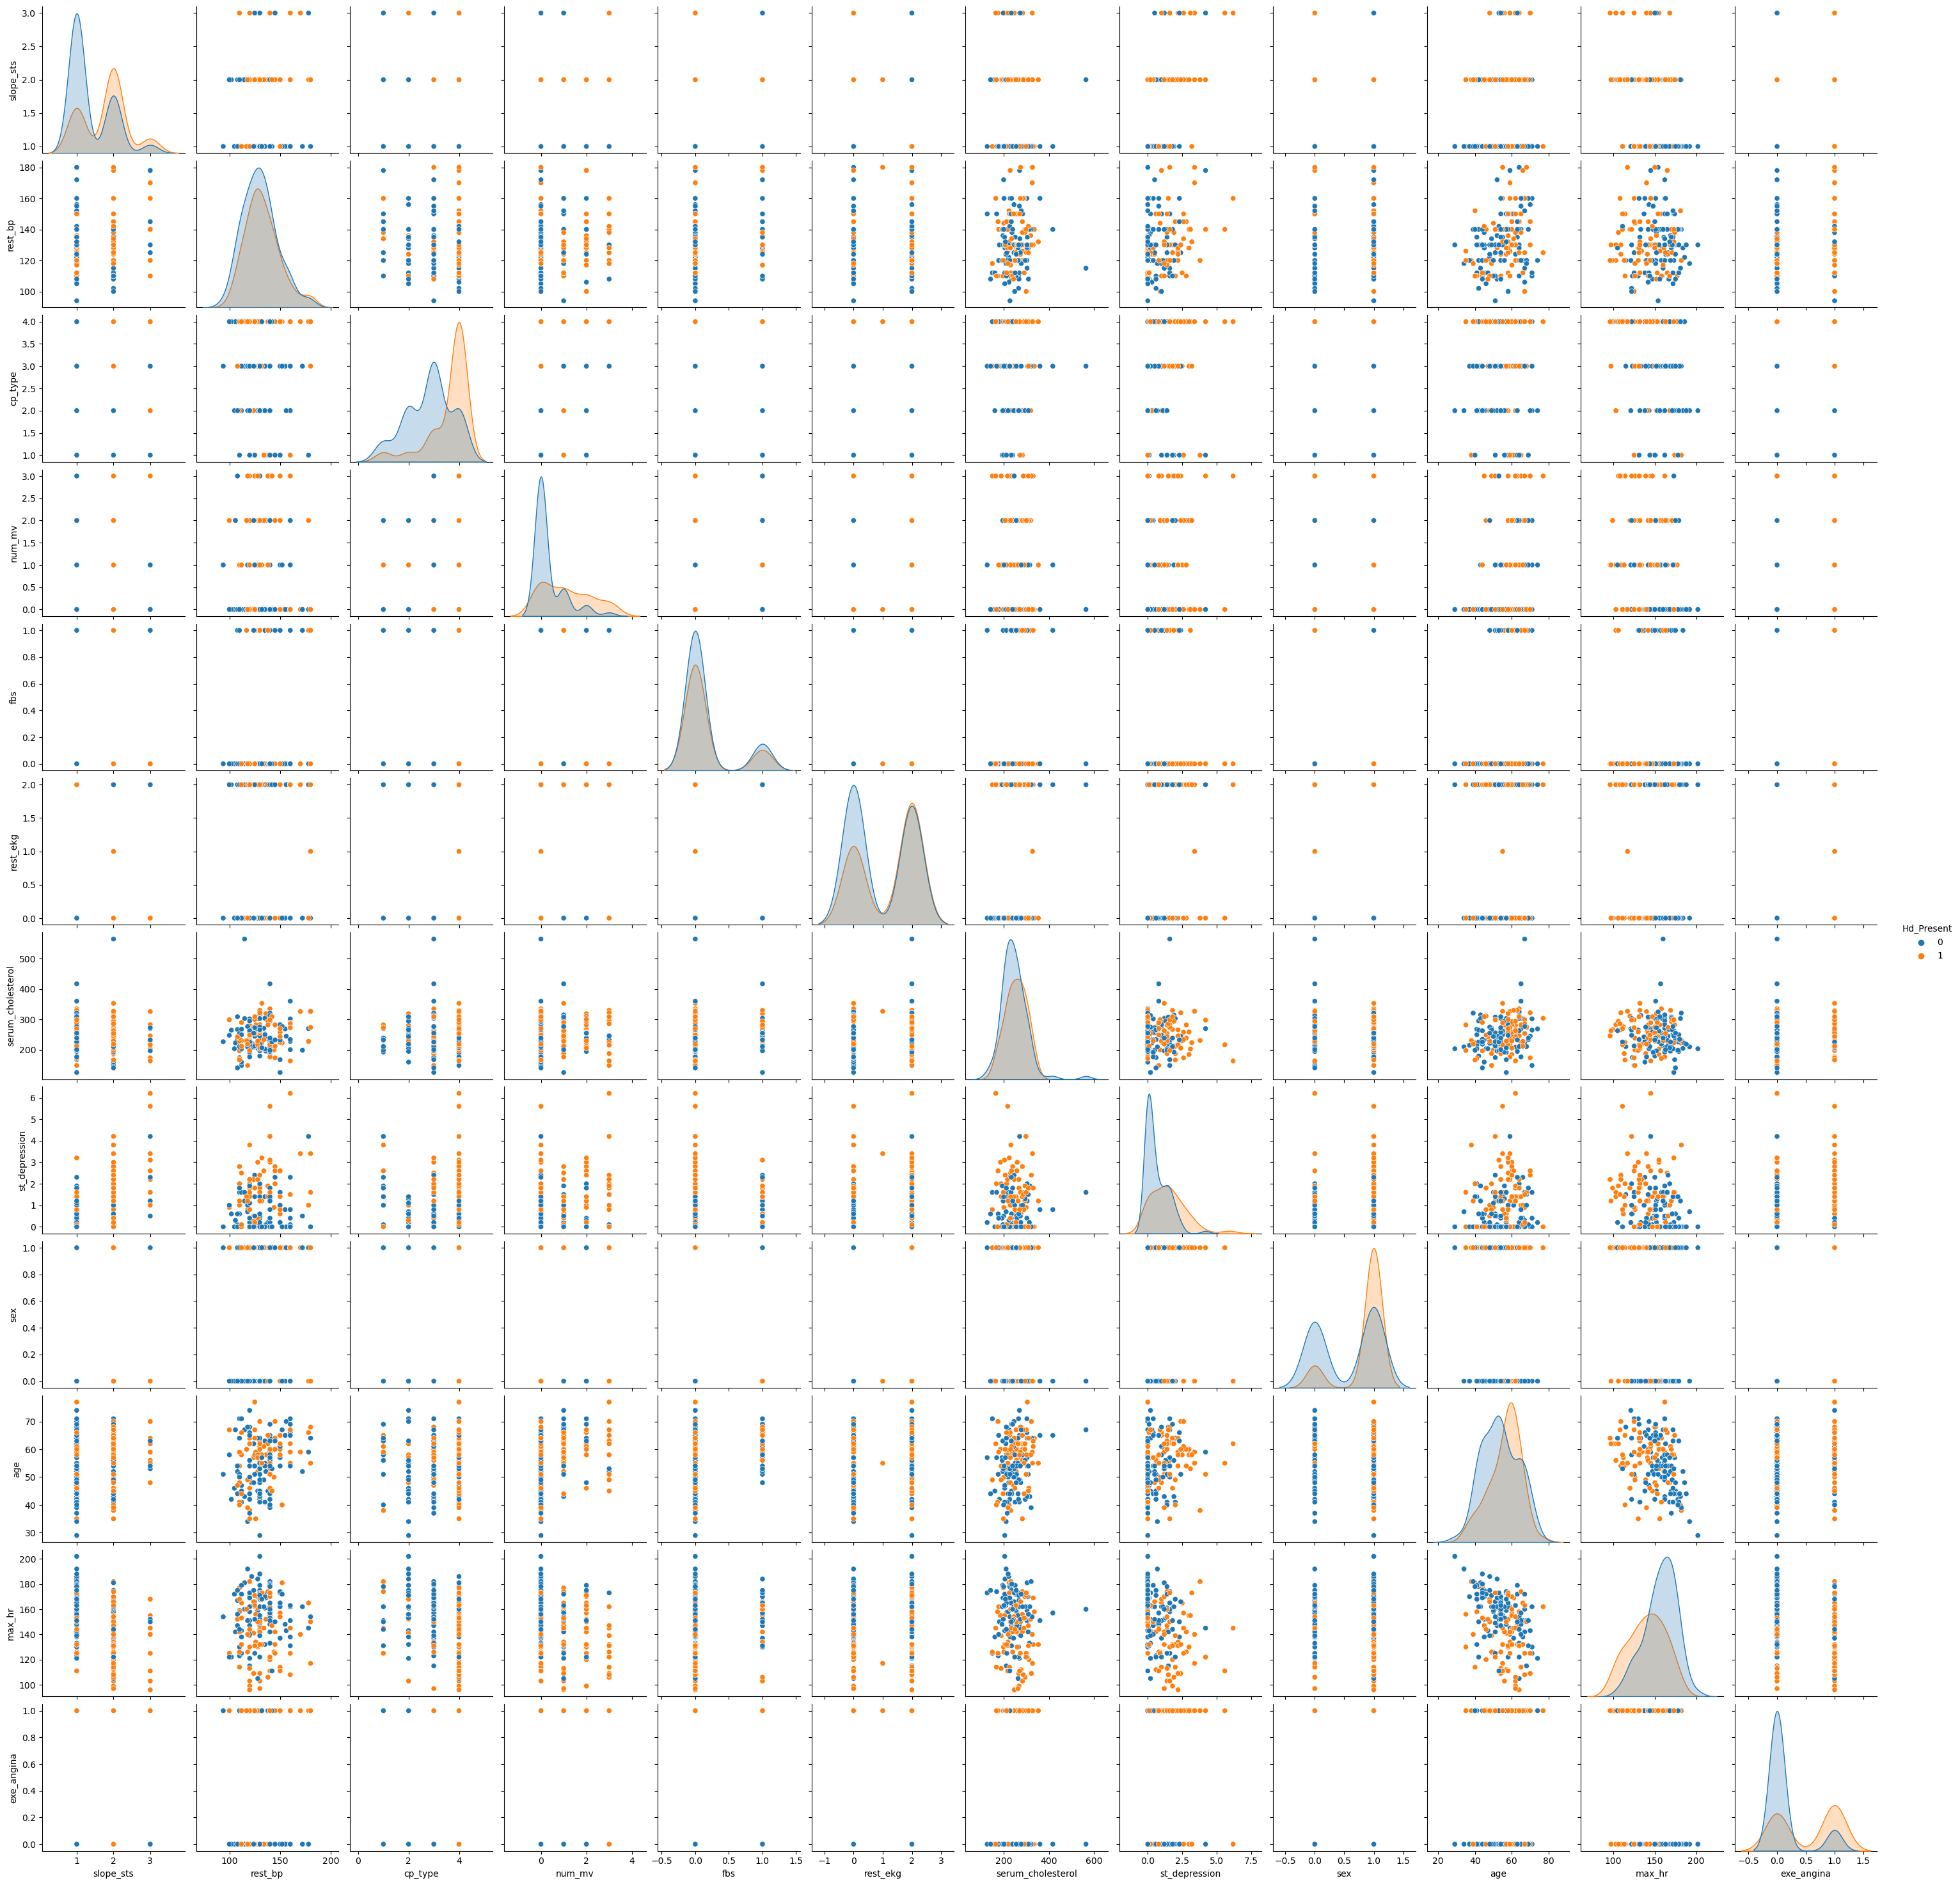

In [41]:
# Pair Plot
sns.pairplot(data=data,hue='Hd_Present')

# insight


= The above graphs shows the distribution of the data
- Most of the people are between 55 and 65
- maximum max_heart_rate_achieved between 140 to 180.
- maximum serum_cholesterol_mg_per_dl between 200 to 300.
- There are more healthy patients than diseased.
- normal Distribution for : serum_cholesterol_mg_per_dl,resting_blood_pressure and age
- oldpeak_eq_st_depression right-skewed
- max_heart_rate_achieved is left-skewed


# DATA PREPROCESSING AND FEATURE ENGINEERING

<AxesSubplot:>

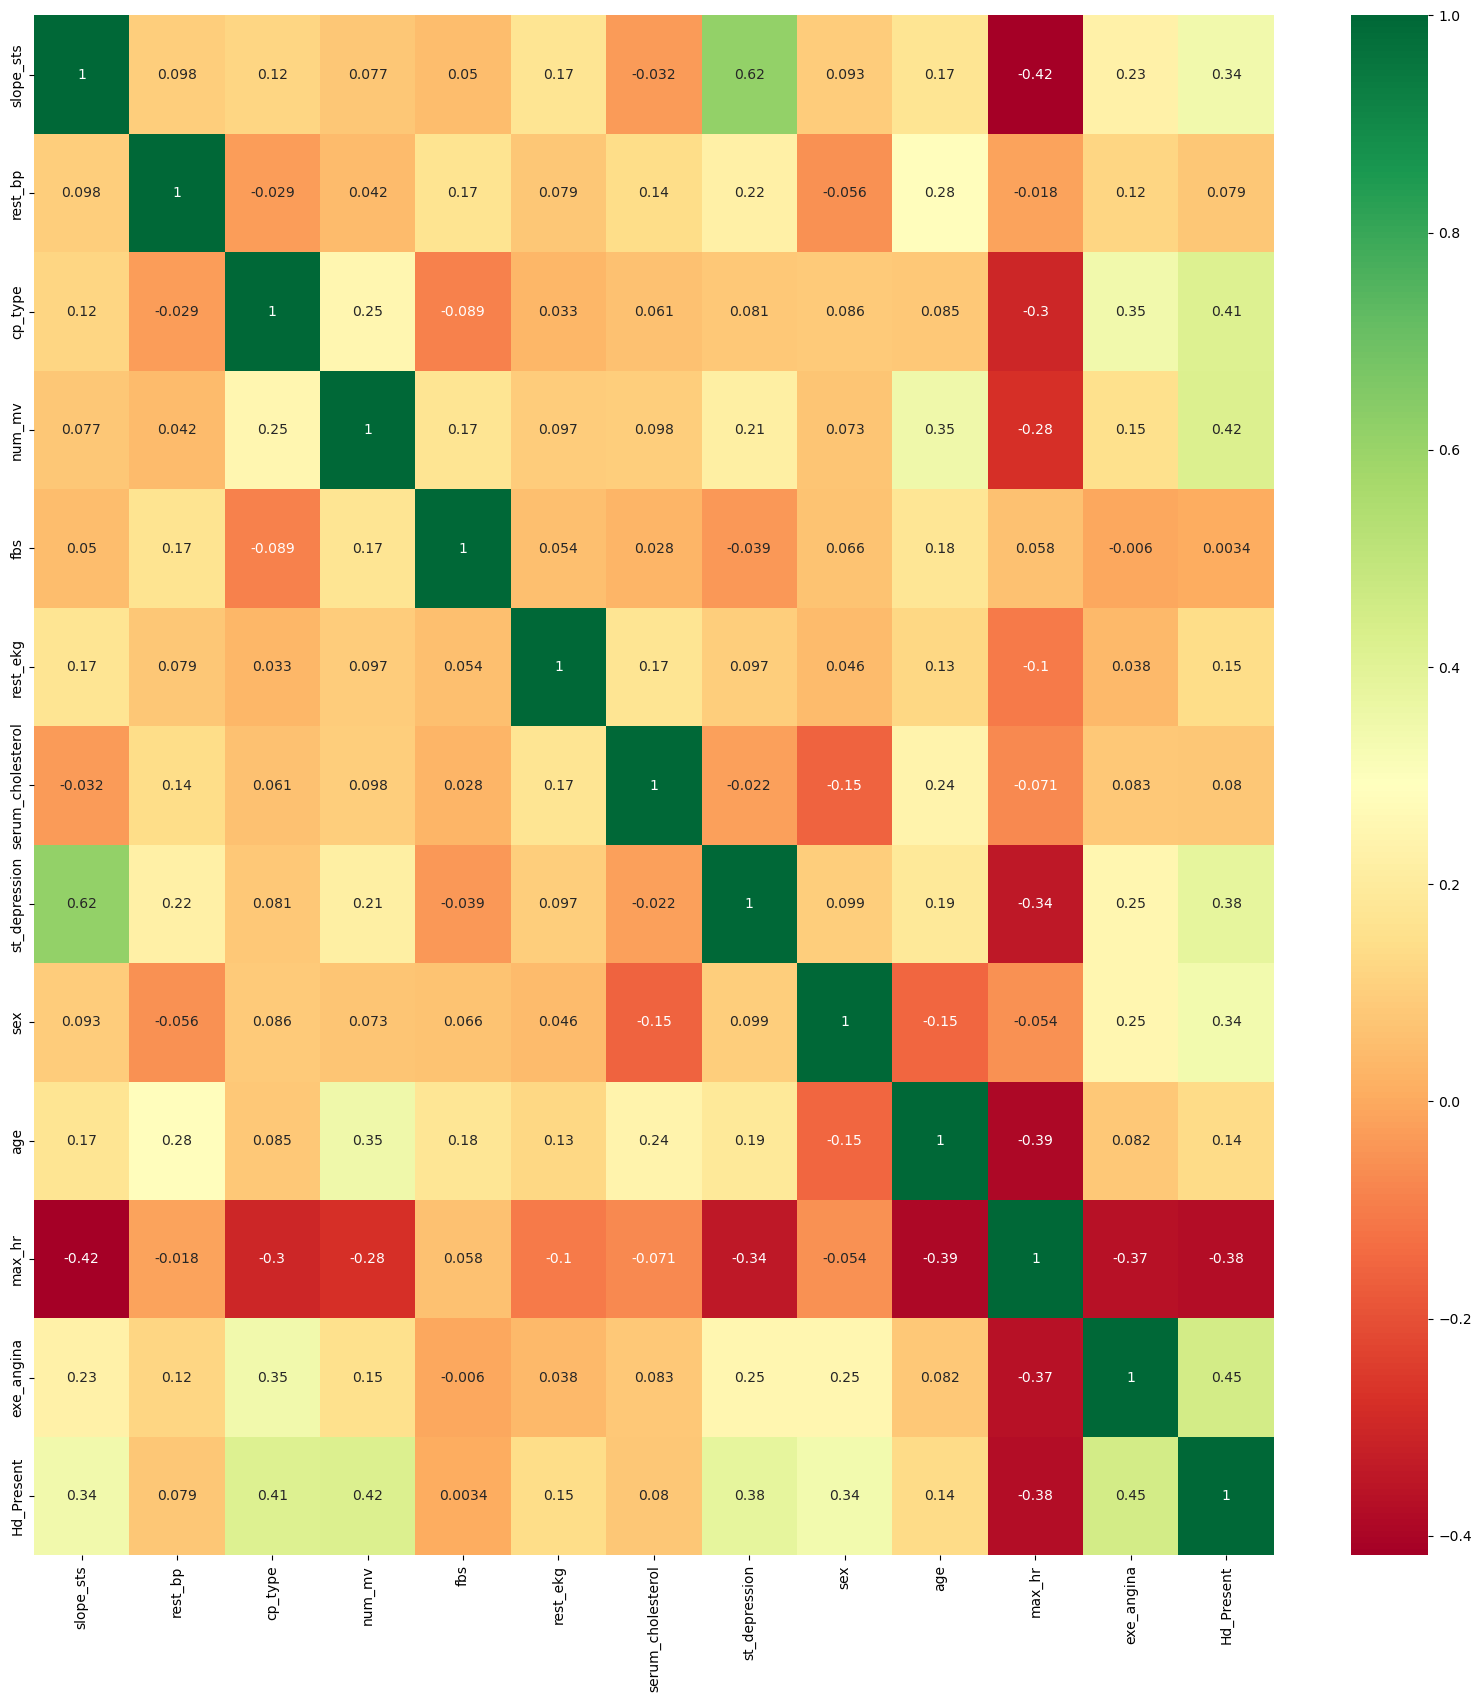

In [42]:
# checking correlation
plt.figure(figsize=(20, 20))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [43]:
data.corr()

,slope_sts,rest_bp,cp_type,num_mv,fbs,rest_ekg,serum_cholesterol,st_depression,sex,age,max_hr,exe_angina,Hd_Present
slope_sts,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
rest_bp,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
cp_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_mv,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fbs,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
rest_ekg,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255


In [44]:
#Checking null values
data.isnull().sum()

patient_id           0
slope_sts            0
thal                 0
rest_bp              0
cp_type              0
num_mv               0
fbs                  0
rest_ekg             0
serum_cholesterol    0
st_depression        0
sex                  0
age                  0
max_hr               0
exe_angina           0
Hd_Present           0
dtype: int64

# there is no missing values

In [45]:
# Checking for duplicate values
data.duplicated().sum()

0

# there is no missing values

In [46]:
# as thal was a categorical data we have to change it to numerical
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.thal=lc.fit_transform(data.thal)


In [47]:
data.head()

,patient_id,slope_sts,thal,rest_bp,cp_type,num_mv,fbs,rest_ekg,serum_cholesterol,st_depression,sex,age,max_hr,exe_angina,Hd_Present
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [48]:
# thal values have been changed

# Checking and Handling Outliers

- there are two outliers rest_bp and serum_cholesterol


<AxesSubplot:xlabel='rest_bp'>

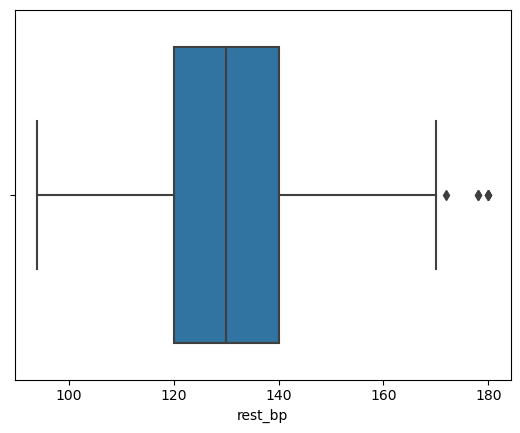

In [49]:

sns.boxplot(x='rest_bp',data=data)

<AxesSubplot:xlabel='serum_cholesterol'>

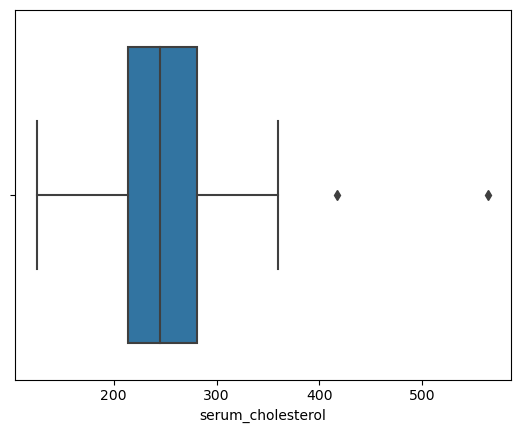

In [50]:
sns.boxplot(x='serum_cholesterol',data=data)

In [51]:
# Droping Patient ID as its not significant
data.drop('patient_id',axis='columns',inplace=True)

In [52]:
data.columns

Index(['slope_sts', 'thal', 'rest_bp', 'cp_type', 'num_mv', 'fbs', 'rest_ekg',
       'serum_cholesterol', 'st_depression', 'sex', 'age', 'max_hr',
       'exe_angina', 'Hd_Present'],
      dtype='object')

In [53]:
data_con=['slope_sts','thal','cp_type','num_mv','rest_ekg']

In [54]:
data_cont=['serum_cholesterol','age','max_hr']

In [55]:
#creating dummies or one hot encoder for nominal values
data=pd.get_dummies(data,columns=data_con,drop_first=True)

In [56]:
data.head()

,rest_bp,fbs,serum_cholesterol,st_depression,sex,age,max_hr,exe_angina,Hd_Present,slope_sts_2,slope_sts_3,thal_1,thal_2,cp_type_2,cp_type_3,cp_type_4,num_mv_1,num_mv_2,num_mv_3,rest_ekg_1,rest_ekg_2
0,128,0,308,0.0,1,45,170,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,110,0,214,1.6,0,54,158,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,125,0,304,0.0,1,77,162,1,1,0,0,1,0,0,0,1,0,0,1,0,1
3,152,0,223,0.0,1,40,181,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,178,0,270,4.2,1,59,145,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[data_cont]=sc.fit_transform(data[data_cont])
data.head()

,rest_bp,fbs,serum_cholesterol,st_depression,sex,age,max_hr,exe_angina,Hd_Present,slope_sts_2,slope_sts_3,thal_1,thal_2,cp_type_2,cp_type_3,cp_type_4,num_mv_1,num_mv_2,num_mv_3,rest_ekg_1,rest_ekg_2
0,128,0,1.118269,0.0,1,-1.053964,0.932485,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,110,0,-0.669778,1.6,0,-0.087134,0.387084,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,125,0,1.042182,0.0,1,2.383654,0.568884,1,1,0,0,1,0,0,0,1,0,0,1,0,1
3,152,0,-0.498582,0.0,1,-1.591092,1.432436,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,178,0,0.395442,4.2,1,0.449994,-0.203768,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [58]:
# Splitting data into X and Y

In [59]:
x=data.drop('Hd_Present',axis=1)

In [60]:
y=data['Hd_Present']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)

## Balancing the Data

In [62]:
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable
print(Counter(y_sm))# checking count after sampling for  each class

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
## preparing training and testing data
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
#Training Data
y_pred=model.predict(x_train)
y_pred

In [ ]:
y_pred_prob=model.predict_proba(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [ ]:
cm=confusion_matrix(y_train,y_pred)
cm

In [ ]:
recall=recall_score(y_train,y_pred)
recall

In [ ]:
precision=precision_score(y_train,y_pred)
precision

In [ ]:
ac1=accuracy_score(y_train,y_pred)
ac1

In [ ]:
f1=f1_score(y_train,y_pred)
f1

In [ ]:
cr=classification_report(y_train,y_pred)
print(cr)

In [ ]:
#Testing Data
y_pred1=model.predict(x_test)
y_pred1

In [ ]:
y_pred_prob1=model.predict_proba(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
cm

In [ ]:
recall=recall_score(y_test,y_pred1)
recall

In [ ]:
f1=f1_score(y_test,y_pred1)
f1

In [ ]:
acc=accuracy_score(y_test,y_pred1)
acc

In [ ]:
cr=classification_report(y_test,y_pred1)
print(cr)

## Decision Tree

In [ ]:
print(Counter(y_test))

In [ ]:
print(Counter(y_train))

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree classifie

dft=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree
dft.fit(x_train,y_train)#training the model
y_hat=dft.predict(x_test)#prediction
y_hat#predicted values

In [ ]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dft.predict(x_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

In [ ]:
y_test_pred = dft.predict(x_test)

In [ ]:
acc_test = accuracy_score(y_test,y_test_pred)
acc_test

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2,3,4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

In [ ]:
tree_cv.best_score_

In [ ]:
dft1=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf= 1,min_samples_split=2,splitter='best')
dft1.fit(x_train,y_train)#training the model
y_pred=dft1.predict(x_test)#prediction
y_pred#predicted values

In [ ]:
y_train_predict=dft1.predict(x_train)#predicting training data to check training performance
y_train_predict

In [ ]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy

In [ ]:
print(classification_report(y_test,y_test_pred))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dft, filled=True)

## Random Forest

In [ ]:
print(Counter(y_train))

In [ ]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rf_clf.fit(x_train,y_train)#training the data

In [ ]:
y_p=rf_clf.predict(x_train)

In [ ]:
y_predict=rf_clf.predict(x_test)#testing
y_predict

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predict))

In [ ]:
acc=accuracy_score(y_test,y_predict)
acc

In [ ]:
f1_Score=f1_score(y_test,y_predict)
f1_Score

In [ ]:
recall=recall_score(y_test,y_predict)
recall

In [ ]:
precision=precision_score(y_test,y_predict)
precision

## SVM

In [ ]:
from sklearn.svm import SVC
svclassifier=SVC()#basemodel with default parameters
svclassifier.fit(x_train,y_train)

In [ ]:
#predict output for x_test
y_hat=svclassifier.predict(x_test)

## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,5,10,50,60,70],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'random_state':(list(range(1,20)))}# defining parameter range
model=SVC()
grid=GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)
grid.fit(x,y)#fitting the model for grid search

In [ ]:
print(grid.best_params_)

In [ ]:
clf=SVC(C=10,gamma=0.001,random_state=1)

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
y_clf=clf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_clf))

In [ ]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0).
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

In [ ]:
error_rate

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)# Predict
y_pred = knn.predict(x_test)

In [ ]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

In [ ]:
recall=recall_score(y_test,y_pred)
recall

In [ ]:
f1=f1_score(y_test,y_pred)
f1

In [ ]:
precision=precision_score(y_test,y_pred)
precision

In [ ]:
print(classification_report(y_test,y_pred))


# FINAL INSIGHT

In [ ]:
We have worked on below given models:
- Logistic Regression
- Decision Tree
- Random Forest
- SVM  
- KNN
Accuracy Values:
- Logistic Regression - 0.80
- Decision Tree - 0.70
- Random Forest - 0.80
- SVM - 0.80
- KNN - 0.76

# CONCLUSION

We have tried with five different machine learning algorithms on the dataset

-Logistic Regression

-KNN

-Random Forest

-SVM

-Decision Tree

-As per our observation Random Forest,SVM and KNN has higher Accuracy value.
So KNN,SVM and Random Forest are the optimised models for Heart Disease Prediction

